<a href="https://colab.research.google.com/github/FabianeAlvesF/impact-of-lifestyle-on-health/blob/main/Lifestyle_and_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health and Lifestyle**

# **1️⃣ Project Title & Overview**

# 📌 Title: "The Impact of Lifestyle Choices on Health: A Data-Driven Analysis"
📌 Overview: "This project explores how lifestyle habits such as diet, exercise, and sleep impact health indicators. The goal is to uncover patterns and create a predictive model for health outcomes."

# Finding and downloading Data from : https://www.kaggle.com/datasets/pratikyuvrajchougule/health-and-lifestyle-data-for-regression

# 2️⃣ Data Cleaning & Preprocessing
- Loading and inspecting the dataset.

- Handling missing values and incorrect data.

- Performing feature engineering if needed.

In [2]:
import os
import shutil

# Criar pasta .kaggle se não existir
os.makedirs("/root/.kaggle", exist_ok=True)

# Mover o kaggle.json para a pasta correta
shutil.move("/content/Kaggle_API", "/root/.kaggle/kaggle.json")

# Garantir que o arquivo tem as permissões corretas
os.chmod("/root/.kaggle/kaggle.json", 600)


In [3]:
!kaggle datasets list


ref                                                              title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                Chocolate Sales Data 📊🍫                                 14473  2025-03-19 03:51:40.270000          16422        278  1.0              
adilshamim8/student-depression-dataset                           Student Depression Dataset                             467020  2025-03-13 03:12:30.423000           7729        118  1.0              
abdulmalik1518/mobiles-dataset-2025                              Mobiles Dataset (2025)                                  20314  2025-02-18 06:50:24.370000          20401        324  1.0              


In [4]:
!kaggle datasets download -d pratikyuvrajchougule/health-and-lifestyle-data-for-regression



Dataset URL: https://www.kaggle.com/datasets/pratikyuvrajchougule/health-and-lifestyle-data-for-regression
License(s): MIT


In [5]:
import zipfile

# Extrair o ZIP
with zipfile.ZipFile("health-and-lifestyle-data-for-regression.zip", "r") as zip_ref:
    zip_ref.extractall("health_lifestyle_data")


In [6]:
!ls health_lifestyle_data


synthetic_health_data.csv


In [7]:
import pandas as pd

df = pd.read_csv("/content/health_lifestyle_data/synthetic_health_data.csv")
df.head()


,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894


In [9]:
import numpy as np

# Load the dataset
df = pd.read_csv("/content/health_lifestyle_data/synthetic_health_data.csv")

# Display basic info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: fill NaN with median)
df.fillna(df.median(), inplace=True)

# Drop duplicates if necessary
df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB
None
               Age          BMI  Exercise_Frequency  Diet_Quality  \
count  1000.000000  1000.000000         1000.000000   1000.000000   
mean     40.231985    25.354181            2.888000     69.952977   
std      11.750591     4.987272            1.995354     14.972061   
min       1.104792    10.298057            0.000000     19.9074

# 3️⃣ Exploratory Data Analysis (EDA)
- Using visualizations to understand patterns.

- Analyzing correlations between lifestyle habits and health.


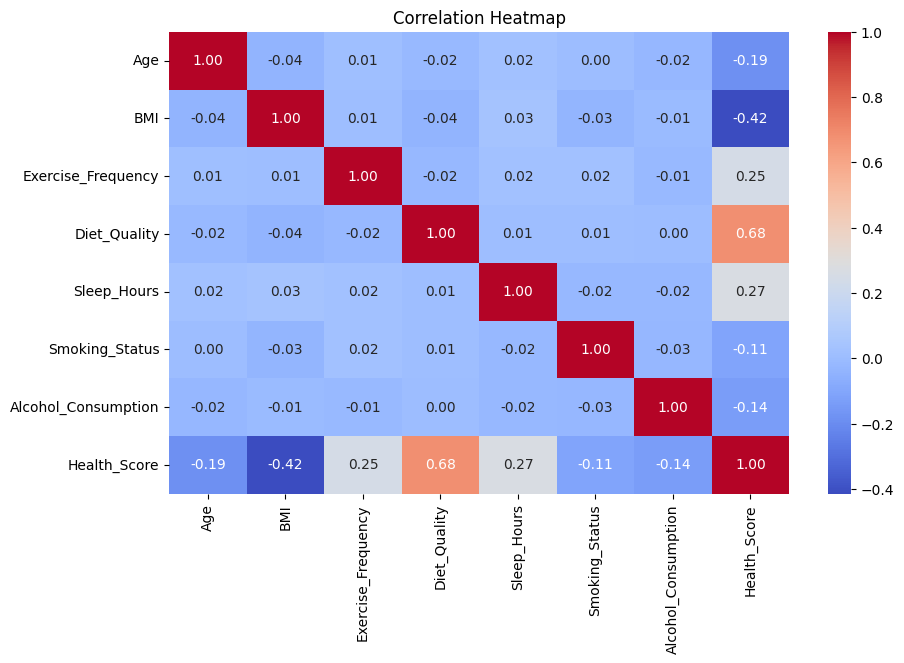

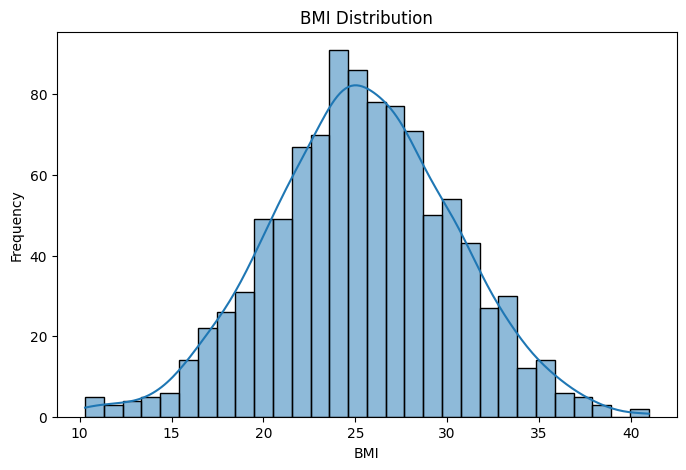

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Example: Distribution of BMI (Body Mass Index)
plt.figure(figsize=(8,5))
sns.histplot(df["BMI"], kde=True, bins=30)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


# 4️⃣ Feature Engineering & Data Transformation
- Normalizing/scaling data if needed.

- Encoding categorical variables.

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Standardize numerical features
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[["BMI", "Exercise_Frequency"]] = scaler.fit_transform(df_scaled[["BMI", "Exercise_Frequency"]])

# Encode categorical features
label_enc = LabelEncoder()
df_scaled["Diet_Quality"] = label_enc.fit_transform(df_scaled["Diet_Quality"])


# 5️⃣ Predictive Modeling
- Trainning a Regression or Classification model depending on the target variable.

- Evaluating the model performance.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecting Features and Target
X = df_scaled.drop(columns=["Health_Score"])
y = df_scaled["Health_Score"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.8320373792259317
MSE: 32.74629035150225


# 6️⃣ Insights & Conclusions

📝 "The analysis revealed a strong correlation between exercise and overall health score. Our model achieved an R² score of 0.83, suggesting that lifestyle habits can effectively predict health outcomes. Future improvements could include a larger dataset and more diverse features."

In [18]:
df.to_csv("health_lifestyle_cleaned.csv", index=False)
from google.colab import files
files.download("health_lifestyle_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

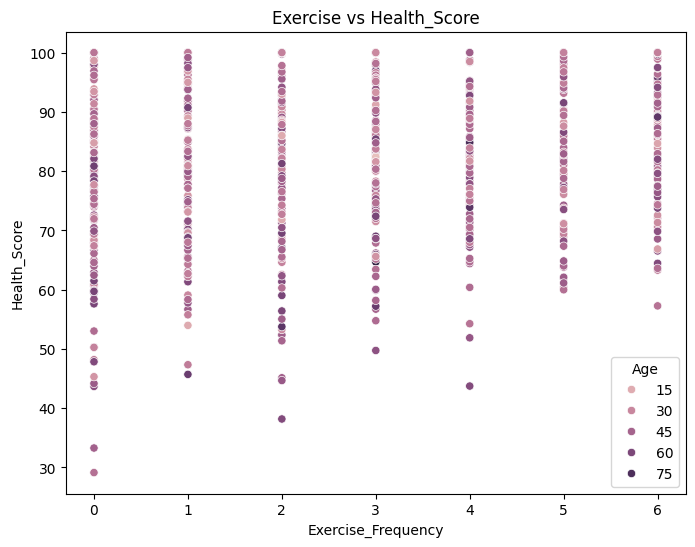

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Scatter plot of Exercise vs Health Score
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Exercise_Frequency"], y=df["Health_Score"], hue=df["Age"])
plt.title("Exercise vs Health_Score")
plt.xlabel("Exercise_Frequency")
plt.ylabel("Health_Score")
plt.savefig("exercise_vs_health.png")  # Saves image in Colab
plt.show()
